#####Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import seaborn as sns

#####Fetch dataset

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

concrete_compressive_strength = fetch_ucirepo(id=165)

In [4]:
x= concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets


In [5]:
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
y.head()

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


#####Check for Missing Values

In [7]:
x.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0


In [8]:
y.isnull().sum()

,0
Concrete compressive strength,0


##### Exploratory Data Analysis

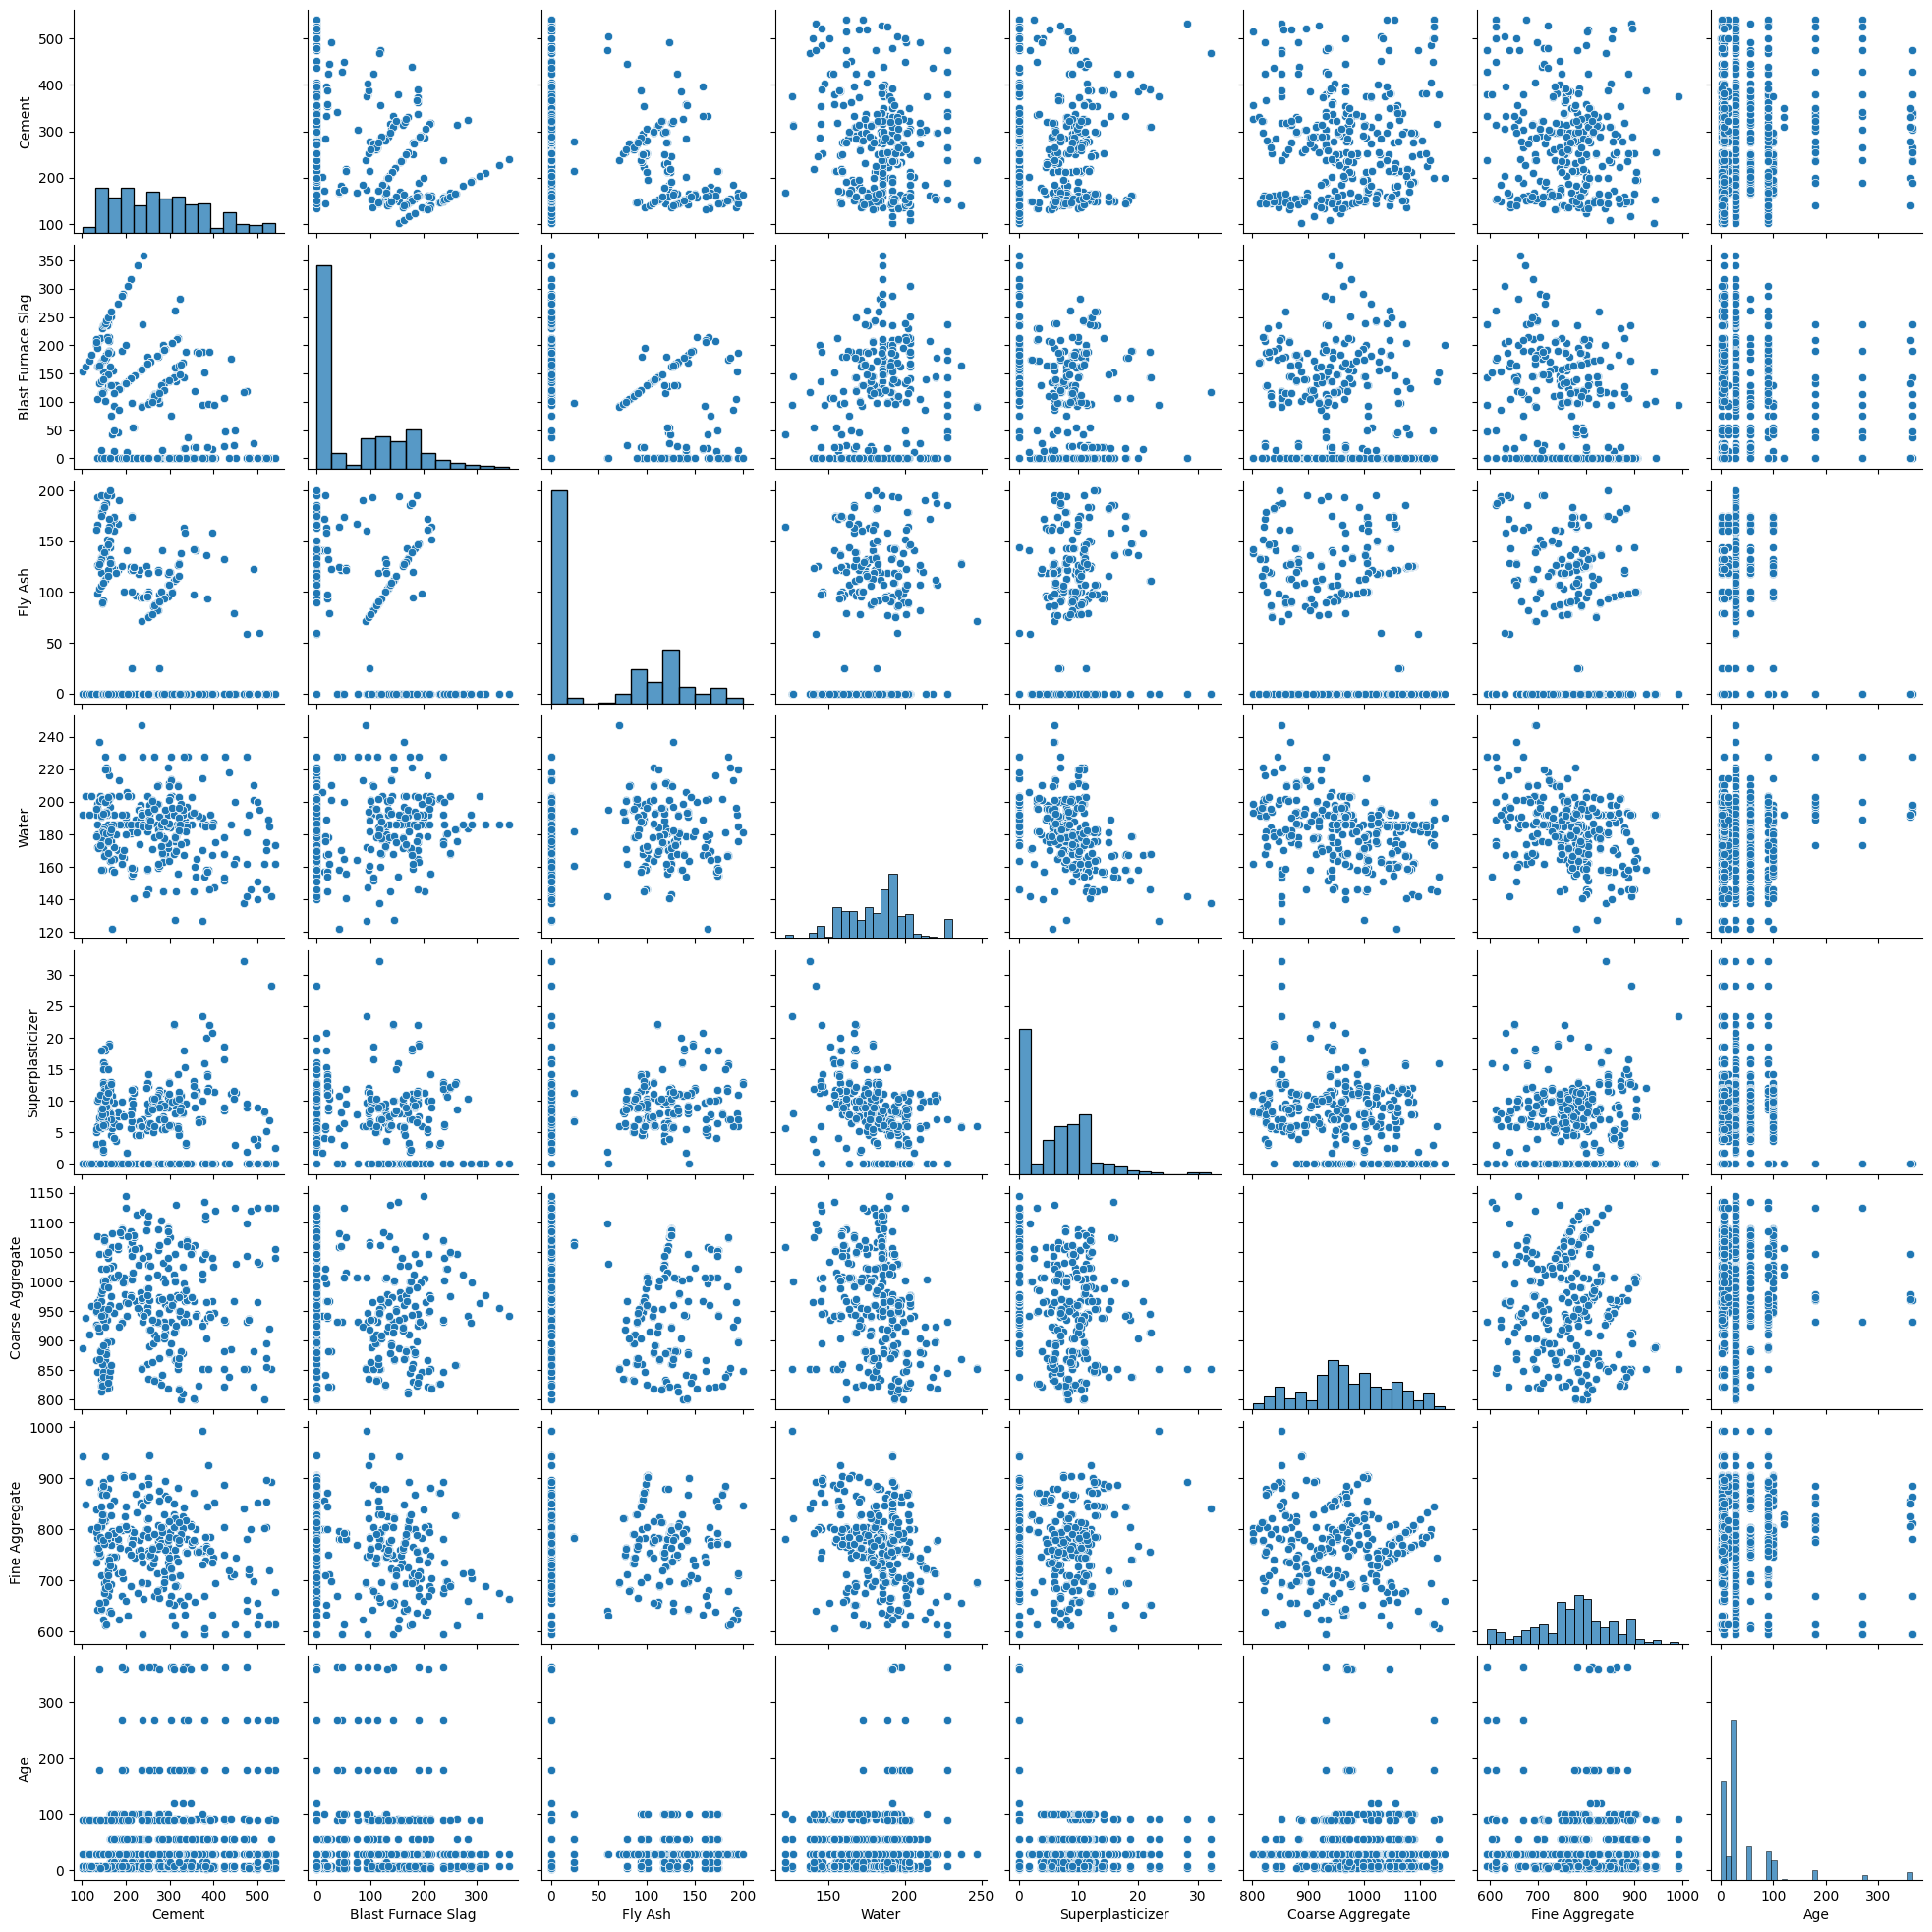

In [9]:
sns.pairplot(x)
plt.show()

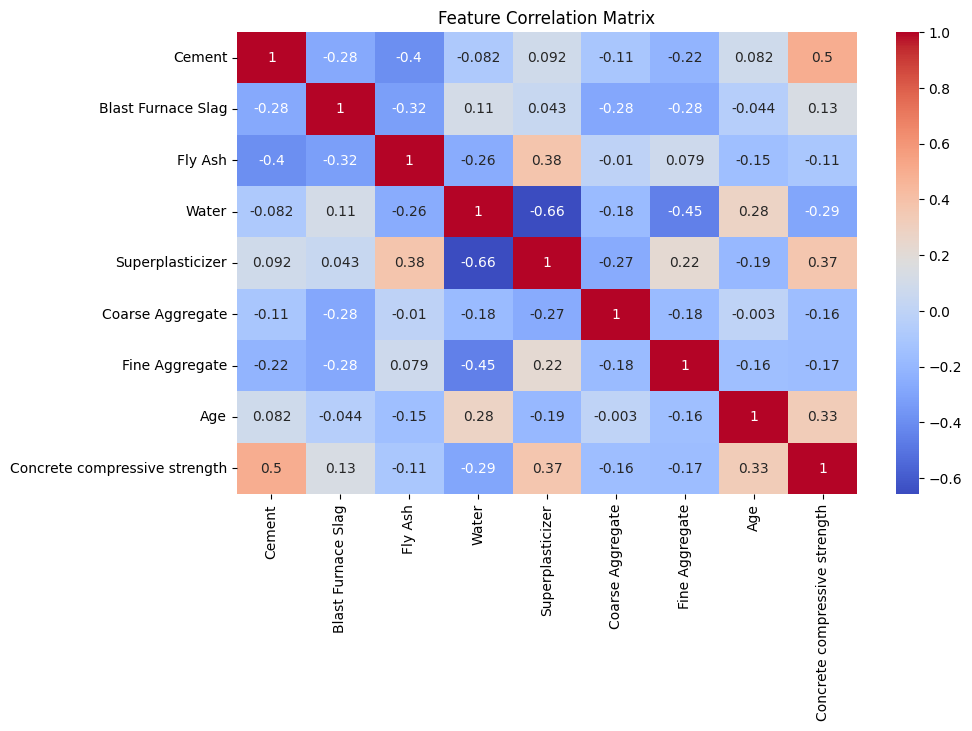

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.concat([x, y], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

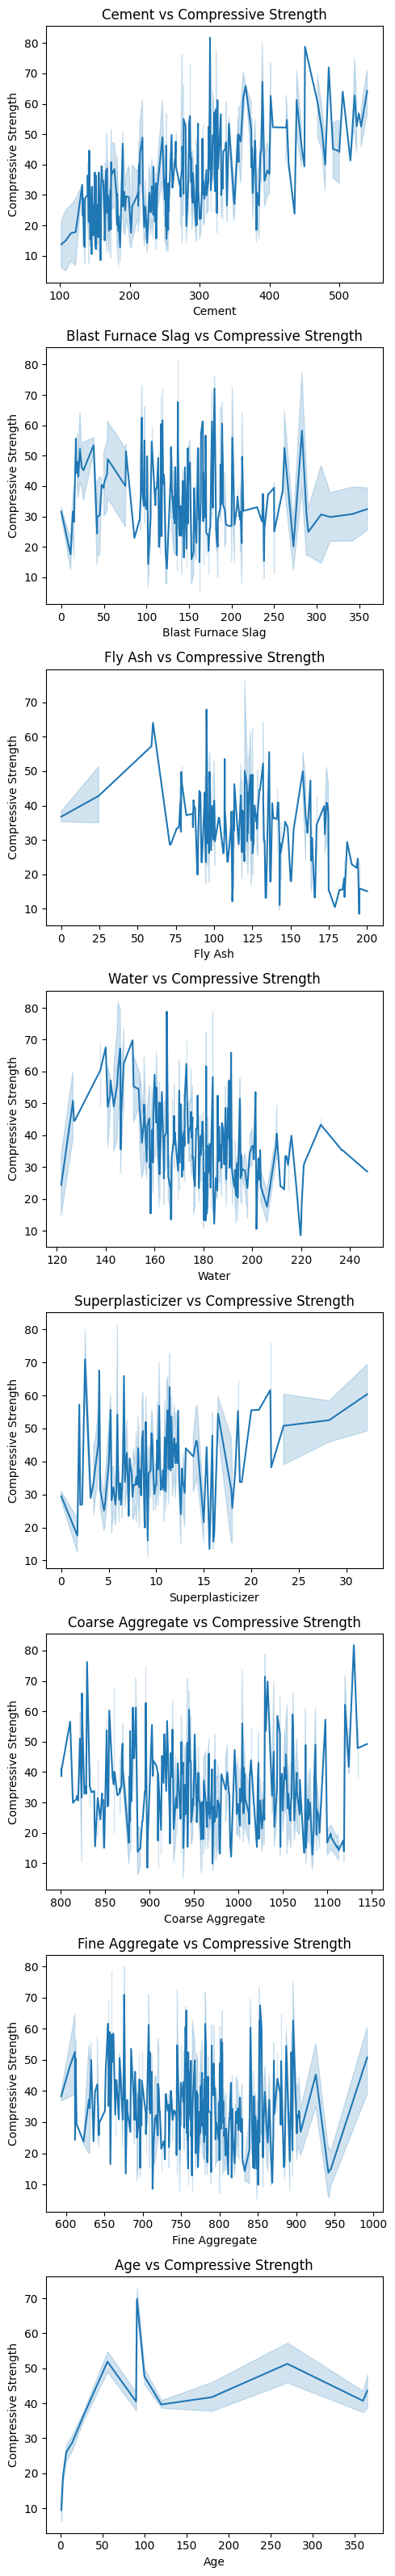

In [11]:
X_df = pd.DataFrame(x, columns=concrete_compressive_strength.feature_names)
X_df['Compressive Strength'] = y


num_features = len(X_df.columns) - 1
plt.figure(figsize=(5, num_features * 4))

for i, feature in enumerate(X_df.columns[:-1]):
    plt.subplot(num_features, 1, i + 1)
    sns.lineplot(x=X_df[feature], y=X_df['Compressive Strength'])
    plt.title(f'{feature} vs Compressive Strength')
    plt.xlabel(feature)
    plt.ylabel('Compressive Strength')

plt.tight_layout()
plt.show()

##### Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =42)

##### Model Training

In [13]:
# polynomial regression
degree = 3
polyr = PolynomialFeatures(degree=degree)
X_poly_train = polyr.fit_transform(X_train)
X_poly_test = polyr.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)
prediction = model.predict(X_poly_test)

In [14]:
# random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.reshape(-1))
y_pred_rf = rf.predict(X_test)

In [15]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#####  Model Evaluation

In [16]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("R-squared Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))


# linear regression evaluation
evaluate(y_test, y_pred_lr, "Linear Regression")
# random forest evaluation
evaluate(y_test, y_pred_rf, "Random Forest")



Linear Regression Performance:
R-squared Score: 0.5943782479239206
RMSE: 10.47620198211852

Random Forest Performance:
R-squared Score: 0.8896262877731614
RMSE: 5.46482261436224


In [17]:
# polynomial regression evalaution
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test,prediction)

print(f'Root Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Root Mean Squared Error: 37.123539041584316
R-squared Score: 0.8627972292157658


##### Visualization of prediction

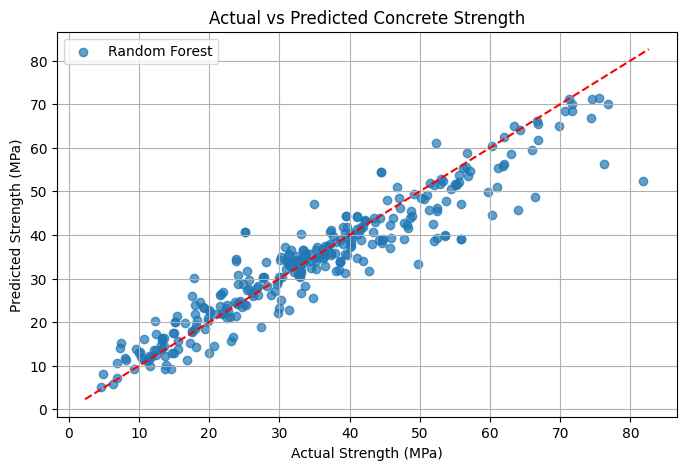

In [18]:
# random forest
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Concrete Strength")
plt.legend()
plt.grid()
plt.show()

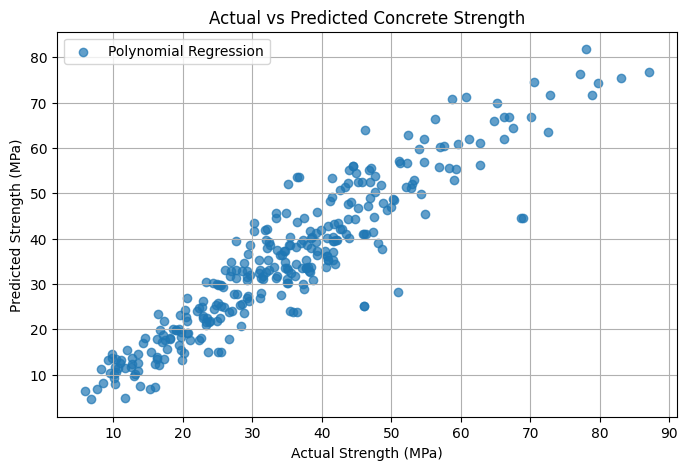

In [19]:
# polynomial regression
plt.figure(figsize=(8, 5))
plt.scatter(prediction,y_test, alpha=0.7, label='Polynomial Regression')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Concrete Strength")
plt.legend()
plt.grid()
plt.show()

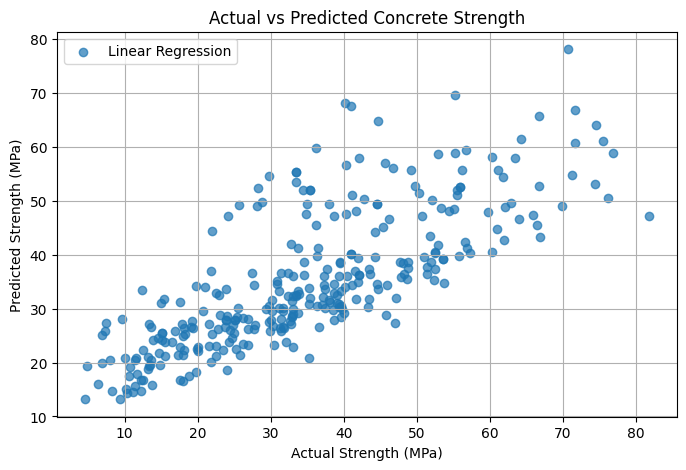

In [20]:
# linear regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.7, label='Linear Regression')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Concrete Strength")
plt.legend()
plt.grid()
plt.show()